# **Bone fracture diagnosis - fracture type multi classification**
### **Abdallah Fekry**
**Model 6**

---

**Fracture Classes**


class 0 = Avulsion fracture

class 1 = Comminuted fracture

class 2 = Compression-Crush fracture

class 3 = Fracture Dislocation

class 4 = Greenstick fracture

class 5 = Hairline Fracture

class 6 = Impacted fracture

class 7 = Intra-articular fracture

class 8 = Longitudinal fracture

class 9 = Oblique fracture

class 10 = Pathological fracture

class 11 = Spiral Fracture

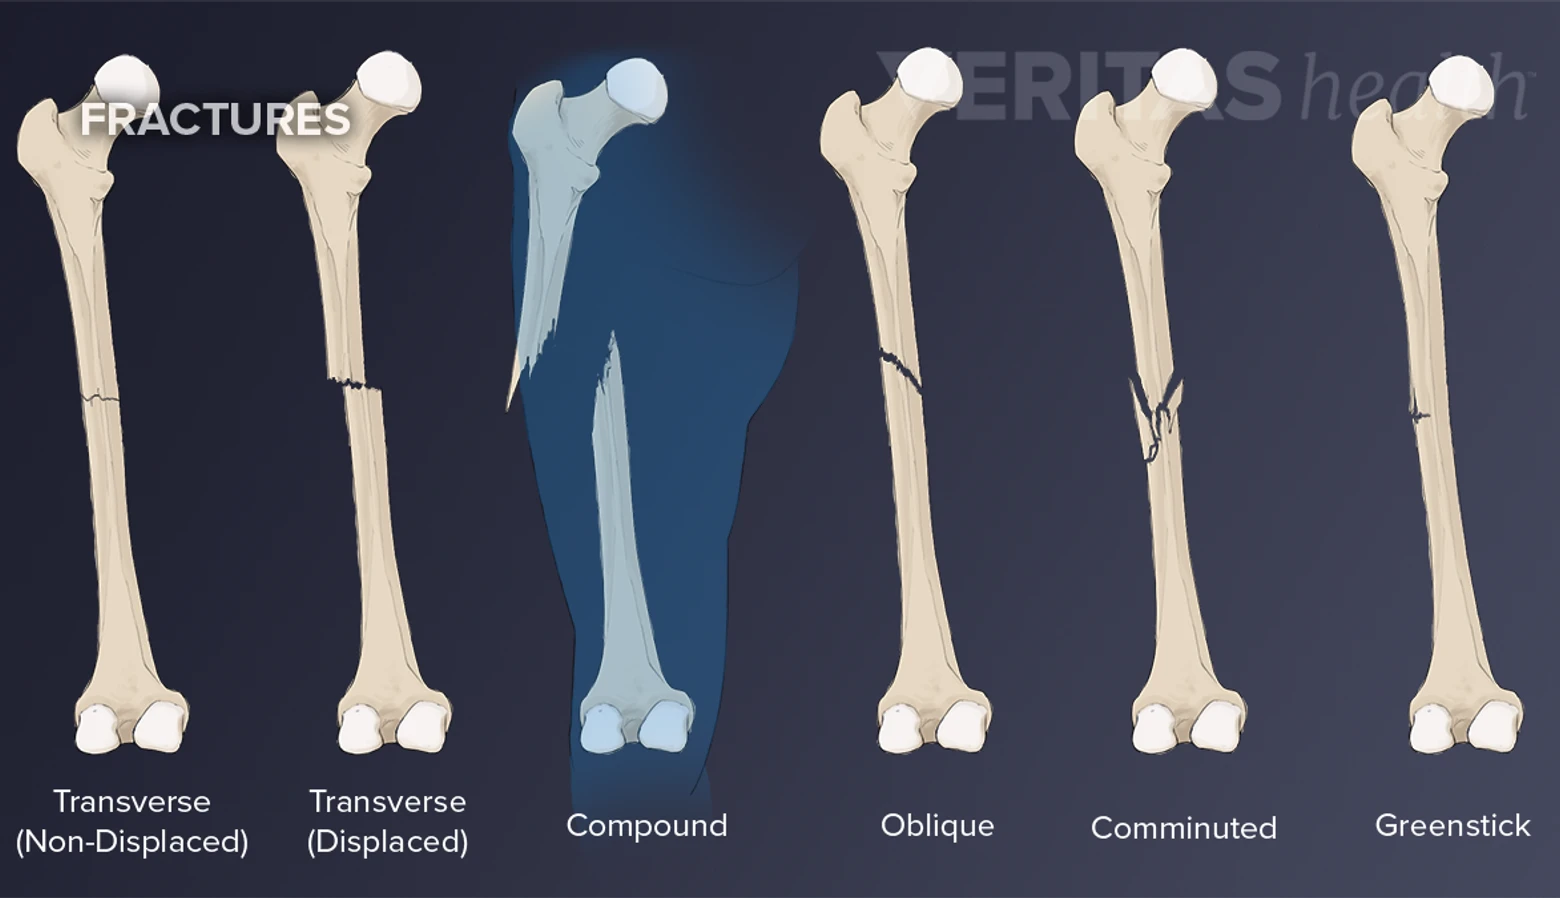

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

!kaggle datasets download -d amohankumar/bone-break-classifier-dataset
!unzip  bone-break-classifier-dataset.zip -d bone-break-classifier-dataset

 95% 145M/153M [00:01<00:00, 108MB/s]
100% 153M/153M [00:01<00:00, 99.1MB/s]
Archive:  bone-break-classifier-dataset.zip
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/000002.png  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/05cc2e0302957e0ad27edb6b9ffbc2_jumbo.jpg  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/1-s2.0-S0899707114002836-gr2.jpg  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/1-s2.0-S1930043318301870-gr4.jpg  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/10140_2019_1711_Fig1_HTML.jpg  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/10140_2019_1711_Fig3_HTML.jpg  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/12891_2019_2585_Fig5_HTML.png  
  inflating: bone-break-classifier-dataset/Avulsion fracture/Avulsion fracture/13256_2019_2325_Fig1_HTML

In [2]:
classes = {0 : 'Avulsion fracture',
           1 : 'Comminuted fracture',
           2 : 'Compression-Crush fracture',
           3 : 'Fracture Dislocation',
           4 : 'Greenstick fracture',
           5 : 'Hairline Fracture',
           6 : 'Impacted fracture',
           7 : 'Intra-articular fracture',
           8 : 'Longitudinal fracture',
           9 : 'Oblique fracture',
           10 : 'Pathological fracture',
           11 : 'Spiral Fracture'}
classes[0]

'Avulsion fracture'

importing libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout, MaxPool2D
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = train_datagen.flow_from_directory('/content/bone-break-classifier-dataset',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training')
test_data = train_datagen.flow_from_directory('/content/bone-break-classifier-dataset',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True,
                                              subset = 'validation')

Found 1522 images belonging to 12 classes.
Found 163 images belonging to 12 classes.


In [8]:
train_data.image_shape

(224, 224, 3)

In [5]:
np.unique(train_data.labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [6]:
np.unique(test_data.labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [7]:
train_data.class_indices

{'Avulsion fracture': 0,
 'Comminuted fracture': 1,
 'Compression-Crush fracture': 2,
 'Fracture Dislocation': 3,
 'Greenstick fracture': 4,
 'Hairline Fracture': 5,
 'Impacted fracture': 6,
 'Intra-articular fracture': 7,
 'Longitudinal fracture': 8,
 'Oblique fracture': 9,
 'Pathological fracture': 10,
 'Spiral Fracture': 11}

# Model 1 - VGG 16 Architecture

In [ ]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 12)                49164     
                                                                 
Total params: 134309708 (512.35 MB)
Trainable params: 11

In [ ]:
test_data.image_shape

(224, 224, 3)

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_acuuracy',restore_best_weights=True)
                  )

Epoch 1/100


I0000 00:00:1709443700.016951     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 1/48 [..............................] - ETA: 8:35 - loss: 2.7529 - accuracy: 0.1111

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - 44s 709ms/step - loss: 5.0761 - accuracy: 0.1307 - val_loss: 2.2853 - val_accuracy: 0.1840
Epoch 2/100
48/48 [==============================] - 14s 288ms/step - loss: 2.0265 - accuracy: 0.3134 - val_loss: 2.0692 - val_accuracy: 0.3681
Epoch 3/100
48/48 [==============================] - 14s 286ms/step - loss: 1.4774 - accuracy: 0.5171 - val_loss: 1.9658 - val_accuracy: 0.3804
Epoch 4/100
48/48 [==============================] - 14s 282ms/step - loss: 1.0497 - accuracy: 0.6334 - val_loss: 2.1326 - val_accuracy: 0.3926
Epoch 5/100
48/48 [==============================] - 14s 283ms/step - loss: 0.7974 - accuracy: 0.7365 - val_loss: 2.3012 - val_accuracy: 0.4479
Epoch 6/100
48/48 [==============================] - 14s 283ms/step - loss: 0.6400 - accuracy: 0.7838 - val_loss: 2.5361 - val_accuracy: 0.4233
Epoch 7/100
48/48 [==============================] - 13s 277ms/step - loss: 0.5701 - accuracy: 0.8114 - val_loss: 2.1580 - val_accuracy: 0.4417
Epoc


KeyboardInterrupt



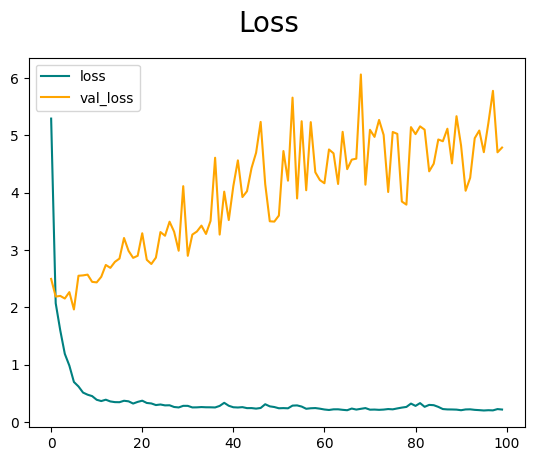

In [ ]:
#Visualizing loss:
fig = plt.figure()
plt.plot(results.history['loss'], color='teal',label='loss')
plt.plot(results.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
loss , acc = model.evaluate(test_data)

6/6 [==============================] - 1s 155ms/step - loss: 4.7860 - accuracy: 0.4847


In [ ]:
# round(loss,4)
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss,sep='')

Test accuracy = 48.47%
Loss = 4.7859978675842285


# Model 2 - Dense Net 201 Architecture

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
# base_model.summary()

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers[:]:
  layer.trainable = False
# base_model.summary()

In [ ]:
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))
model2.add(Dense(1000, activation='relu'))
# model.add(Dense(4096, activation='relu'))
model2.add(Dense(12, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_1 (Flatten)         (None, 94080)             0         
                                                                 
 dense_3 (Dense)             (None, 1000)              94081000  
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 12)                12012     
                                                                 
Total params: 113415996 (432.65 MB)
Trainable params: 95094012 (362.75 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results2 = model2.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_acuuracy',restore_best_weights=True)
                  )

Epoch 1/100
48/48 [==============================] - 45s 557ms/step - loss: 12.5145 - accuracy: 0.1997 - val_loss: 2.1510 - val_accuracy: 0.2761
Epoch 2/100
48/48 [==============================] - 14s 290ms/step - loss: 1.5650 - accuracy: 0.5210 - val_loss: 2.0175 - val_accuracy: 0.3804
Epoch 3/100
48/48 [==============================] - 15s 306ms/step - loss: 0.9369 - accuracy: 0.7030 - val_loss: 2.0267 - val_accuracy: 0.4663
Epoch 4/100
48/48 [==============================] - 14s 292ms/step - loss: 0.6518 - accuracy: 0.8042 - val_loss: 2.1404 - val_accuracy: 0.4908
Epoch 5/100
48/48 [==============================] - 14s 287ms/step - loss: 0.5845 - accuracy: 0.8311 - val_loss: 2.3680 - val_accuracy: 0.4540
Epoch 6/100
48/48 [==============================] - 14s 294ms/step - loss: 0.4990 - accuracy: 0.8535 - val_loss: 2.0885 - val_accuracy: 0.4724
Epoch 7/100
48/48 [==============================] - 14s 288ms/step - loss: 0.4578 - accuracy: 0.8528 - val_loss: 2.1713 - val_accuracy

**Model 3**

In [ ]:
input_data = Input(shape=(224,224,3), name='input')
from tensorflow.keras.applications import InceptionResNetV2
from keras.layers import GlobalAveragePooling2D, BatchNormalization
base_model3 = InceptionResNetV2(weights='imagenet', input_shape = (224,224,3),include_top=False)
# for layer in base_model3.layers[:]:
#   layer.trainable = False
# base_model.summary()
model3 = Sequential()
model3.add(base_model3)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(128, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(12, activation = 'softmax'))
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 128)               196736    
                                                                 
 batch_normalization_611 (B  (None, 128)               512       
 atchNormalization)                                              
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
model3.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results3 = model3.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_acuuracy',restore_best_weights=True)
                  )

Epoch 1/100
48/48 [==============================] - 111s 633ms/step - loss: 2.5908 - accuracy: 0.2221 - val_loss: 3.5515 - val_accuracy: 0.0982
Epoch 2/100
48/48 [==============================] - 28s 572ms/step - loss: 1.9807 - accuracy: 0.3804 - val_loss: 18.4534 - val_accuracy: 0.1472
Epoch 3/100
48/48 [==============================] - 27s 561ms/step - loss: 1.6828 - accuracy: 0.4711 - val_loss: 144.8668 - val_accuracy: 0.1288
Epoch 4/100
48/48 [==============================] - 27s 560ms/step - loss: 1.3378 - accuracy: 0.5920 - val_loss: 16.2336 - val_accuracy: 0.2515
Epoch 5/100
48/48 [==============================] - 27s 562ms/step - loss: 1.1412 - accuracy: 0.6583 - val_loss: 2.6534 - val_accuracy: 0.3313
Epoch 6/100
48/48 [==============================] - 27s 564ms/step - loss: 0.8454 - accuracy: 0.7326 - val_loss: 2.0552 - val_accuracy: 0.3742
Epoch 7/100
48/48 [==============================] - 27s 562ms/step - loss: 0.7167 - accuracy: 0.7694 - val_loss: 1.9704 - val_accu


KeyboardInterrupt



In [15]:
from keras import layers, models
input_layer = layers.Input(shape=(224,224, 3))

x = layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(input_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    64,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    128,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    256,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

output_layer = layers.Dense(units=12, activation="softmax")(x)

model4 = models.Model(input_layer, output_layer)

model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_98 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_99 (Ba  (None, 112, 112, 32)      128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 112, 112, 32)      0         
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_99 (Conv2D)          (None, 56, 56, 64)        18496     
                                                           

In [17]:
from keras.optimizers import Adam
model4.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results4 = model4.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_acuuracy',restore_best_weights=True)
                  )

Epoch 1/100
12/48 [======>.......................] - ETA: 5s - loss: 2.9240 - accuracy: 0.1380

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - ETA: 0s - loss: 2.6162 - accuracy: 0.1656

48/48 [==============================] - 22s 300ms/step - loss: 2.6162 - accuracy: 0.1656 - val_loss: 2.4469 - val_accuracy: 0.2086
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 2.1529 - accuracy: 0.2904

48/48 [==============================] - 15s 321ms/step - loss: 2.1529 - accuracy: 0.2904 - val_loss: 2.5502 - val_accuracy: 0.2209
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 1.8339 - accuracy: 0.3988

48/48 [==============================] - 13s 269ms/step - loss: 1.8339 - accuracy: 0.3988 - val_loss: 2.4185 - val_accuracy: 0.2577
Epoch 4/100
48/48 [==============================] - ETA: 0s - loss: 1.4543 - accuracy: 0.5499

48/48 [==============================] - 13s 267ms/step - loss: 1.4543 - accuracy: 0.5499 - val_loss: 2.2100 - val_accuracy: 0.3374
Epoch 5/100
48/48 [==============================] - ETA: 0s - loss: 1.0289 - accuracy: 0.6905

48/48 [==============================] - 13s 271ms/step - loss: 1.0289 - accuracy: 0.6905 - val_loss: 2.2095 - val_accuracy: 0.4233
Epoch 6/100
48/48 [==============================] - ETA: 0s - loss: 0.7993 - accuracy: 0.7707

48/48 [==============================] - 13s 273ms/step - loss: 0.7993 - accuracy: 0.7707 - val_loss: 2.3311 - val_accuracy: 0.4049
Epoch 7/100
48/48 [==============================] - ETA: 0s - loss: 0.6417 - accuracy: 0.8246

48/48 [==============================] - 13s 273ms/step - loss: 0.6417 - accuracy: 0.8246 - val_loss: 2.1405 - val_accuracy: 0.4417
Epoch 8/100
48/48 [==============================] - ETA: 0s - loss: 0.5003 - accuracy: 0.8535

48/48 [==============================] - 13s 262ms/step - loss: 0.5003 - accuracy: 0.8535 - val_loss: 2.1530 - val_accuracy: 0.4049
Epoch 9/100
48/48 [==============================] - ETA: 0s - loss: 0.5045 - accuracy: 0.8476

48/48 [==============================] - 13s 268ms/step - loss: 0.5045 - accuracy: 0.8476 - val_loss: 2.3095 - val_accuracy: 0.3926
Epoch 10/100
48/48 [==============================] - ETA: 0s - loss: 0.4256 - accuracy: 0.8725

48/48 [==============================] - 13s 272ms/step - loss: 0.4256 - accuracy: 0.8725 - val_loss: 2.2764 - val_accuracy: 0.4110
Epoch 11/100
48/48 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.8706

48/48 [==============================] - 14s 297ms/step - loss: 0.3950 - accuracy: 0.8706 - val_loss: 2.2176 - val_accuracy: 0.4356
Epoch 12/100
48/48 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8633

48/48 [==============================] - 13s 263ms/step - loss: 0.3752 - accuracy: 0.8633 - val_loss: 2.2141 - val_accuracy: 0.4233
Epoch 13/100
48/48 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8693

48/48 [==============================] - 13s 270ms/step - loss: 0.3635 - accuracy: 0.8693 - val_loss: 2.1774 - val_accuracy: 0.4479
Epoch 14/100
48/48 [==============================] - ETA: 0s - loss: 0.3462 - accuracy: 0.8640

48/48 [==============================] - 13s 268ms/step - loss: 0.3462 - accuracy: 0.8640 - val_loss: 2.2622 - val_accuracy: 0.4233
Epoch 15/100
48/48 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8732

48/48 [==============================] - 13s 276ms/step - loss: 0.3521 - accuracy: 0.8732 - val_loss: 2.2695 - val_accuracy: 0.4049
Epoch 16/100
48/48 [==============================] - ETA: 0s - loss: 0.3359 - accuracy: 0.8719

48/48 [==============================] - 13s 268ms/step - loss: 0.3359 - accuracy: 0.8719 - val_loss: 2.2207 - val_accuracy: 0.4233
Epoch 17/100
48/48 [==============================] - ETA: 0s - loss: 0.3142 - accuracy: 0.8771

48/48 [==============================] - 13s 270ms/step - loss: 0.3142 - accuracy: 0.8771 - val_loss: 2.3206 - val_accuracy: 0.4417
Epoch 18/100
48/48 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.8693

48/48 [==============================] - 13s 272ms/step - loss: 0.3193 - accuracy: 0.8693 - val_loss: 2.2128 - val_accuracy: 0.4479
Epoch 19/100
48/48 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.8732

48/48 [==============================] - 13s 272ms/step - loss: 0.2914 - accuracy: 0.8732 - val_loss: 2.1722 - val_accuracy: 0.4417
Epoch 20/100
48/48 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.8666

48/48 [==============================] - 13s 273ms/step - loss: 0.3138 - accuracy: 0.8666 - val_loss: 2.4422 - val_accuracy: 0.4110
Epoch 21/100
48/48 [==============================] - ETA: 0s - loss: 0.3033 - accuracy: 0.8712

48/48 [==============================] - 13s 272ms/step - loss: 0.3033 - accuracy: 0.8712 - val_loss: 2.4952 - val_accuracy: 0.3926
Epoch 22/100
48/48 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.8732

48/48 [==============================] - 13s 274ms/step - loss: 0.2934 - accuracy: 0.8732 - val_loss: 2.2422 - val_accuracy: 0.4294
Epoch 23/100
48/48 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.8673

48/48 [==============================] - 13s 275ms/step - loss: 0.2872 - accuracy: 0.8673 - val_loss: 2.1644 - val_accuracy: 0.4294
Epoch 24/100
48/48 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.8732

48/48 [==============================] - 13s 268ms/step - loss: 0.2917 - accuracy: 0.8732 - val_loss: 2.2329 - val_accuracy: 0.4294
Epoch 25/100
48/48 [==============================] - ETA: 0s - loss: 0.2906 - accuracy: 0.8693

48/48 [==============================] - 13s 273ms/step - loss: 0.2906 - accuracy: 0.8693 - val_loss: 2.2878 - val_accuracy: 0.4110
Epoch 26/100
48/48 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.8725

48/48 [==============================] - 13s 269ms/step - loss: 0.2867 - accuracy: 0.8725 - val_loss: 2.2808 - val_accuracy: 0.4540
Epoch 27/100
48/48 [==============================] - ETA: 0s - loss: 0.2786 - accuracy: 0.8653

48/48 [==============================] - 13s 276ms/step - loss: 0.2786 - accuracy: 0.8653 - val_loss: 2.2965 - val_accuracy: 0.4417
Epoch 28/100
48/48 [==============================] - ETA: 0s - loss: 0.2735 - accuracy: 0.8739

48/48 [==============================] - 13s 269ms/step - loss: 0.2735 - accuracy: 0.8739 - val_loss: 2.3582 - val_accuracy: 0.4356
Epoch 29/100
48/48 [==============================] - ETA: 0s - loss: 0.2841 - accuracy: 0.8647

48/48 [==============================] - 13s 271ms/step - loss: 0.2841 - accuracy: 0.8647 - val_loss: 2.3454 - val_accuracy: 0.4294
Epoch 30/100
48/48 [==============================] - ETA: 0s - loss: 0.2713 - accuracy: 0.8765

48/48 [==============================] - 25s 517ms/step - loss: 0.2713 - accuracy: 0.8765 - val_loss: 2.3788 - val_accuracy: 0.4233
Epoch 31/100
48/48 [==============================] - ETA: 0s - loss: 0.2752 - accuracy: 0.8745

48/48 [==============================] - 15s 300ms/step - loss: 0.2752 - accuracy: 0.8745 - val_loss: 2.2679 - val_accuracy: 0.4294
Epoch 32/100
48/48 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.8771

48/48 [==============================] - 13s 268ms/step - loss: 0.2693 - accuracy: 0.8771 - val_loss: 2.2630 - val_accuracy: 0.4356
Epoch 33/100
48/48 [==============================] - ETA: 0s - loss: 0.2753 - accuracy: 0.8739

48/48 [==============================] - 13s 270ms/step - loss: 0.2753 - accuracy: 0.8739 - val_loss: 2.2229 - val_accuracy: 0.4417
Epoch 34/100
48/48 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8798

48/48 [==============================] - 13s 269ms/step - loss: 0.2625 - accuracy: 0.8798 - val_loss: 2.3378 - val_accuracy: 0.4294
Epoch 35/100
48/48 [==============================] - ETA: 0s - loss: 0.2603 - accuracy: 0.8712

48/48 [==============================] - 13s 267ms/step - loss: 0.2603 - accuracy: 0.8712 - val_loss: 2.2631 - val_accuracy: 0.4233
Epoch 36/100
48/48 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.8660

48/48 [==============================] - 13s 265ms/step - loss: 0.2672 - accuracy: 0.8660 - val_loss: 2.3002 - val_accuracy: 0.4356
Epoch 37/100
48/48 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.8725

48/48 [==============================] - 13s 265ms/step - loss: 0.2633 - accuracy: 0.8725 - val_loss: 2.4236 - val_accuracy: 0.4233
Epoch 38/100
48/48 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 0.8778

48/48 [==============================] - 13s 275ms/step - loss: 0.2655 - accuracy: 0.8778 - val_loss: 2.4503 - val_accuracy: 0.3926
Epoch 39/100
48/48 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.8758

48/48 [==============================] - 13s 268ms/step - loss: 0.2544 - accuracy: 0.8758 - val_loss: 2.3732 - val_accuracy: 0.4294
Epoch 40/100
48/48 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.8798

48/48 [==============================] - 13s 270ms/step - loss: 0.2529 - accuracy: 0.8798 - val_loss: 2.4115 - val_accuracy: 0.4356
Epoch 41/100
48/48 [==============================] - ETA: 0s - loss: 0.2613 - accuracy: 0.8798

48/48 [==============================] - 13s 264ms/step - loss: 0.2613 - accuracy: 0.8798 - val_loss: 2.4594 - val_accuracy: 0.4172
Epoch 42/100
48/48 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.8739

48/48 [==============================] - 13s 277ms/step - loss: 0.2631 - accuracy: 0.8739 - val_loss: 2.3279 - val_accuracy: 0.4233
Epoch 43/100
48/48 [==============================] - ETA: 0s - loss: 0.2569 - accuracy: 0.8719

48/48 [==============================] - 13s 270ms/step - loss: 0.2569 - accuracy: 0.8719 - val_loss: 2.3606 - val_accuracy: 0.4356
Epoch 44/100
48/48 [==============================] - ETA: 0s - loss: 0.2390 - accuracy: 0.8778

48/48 [==============================] - 14s 287ms/step - loss: 0.2390 - accuracy: 0.8778 - val_loss: 2.4019 - val_accuracy: 0.4233
Epoch 45/100
48/48 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.8725

48/48 [==============================] - 12s 261ms/step - loss: 0.2618 - accuracy: 0.8725 - val_loss: 2.3174 - val_accuracy: 0.3988
Epoch 46/100
48/48 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.8798

48/48 [==============================] - 13s 264ms/step - loss: 0.2531 - accuracy: 0.8798 - val_loss: 2.2838 - val_accuracy: 0.4233
Epoch 47/100
48/48 [==============================] - ETA: 0s - loss: 0.2478 - accuracy: 0.8732

48/48 [==============================] - 13s 262ms/step - loss: 0.2478 - accuracy: 0.8732 - val_loss: 2.3391 - val_accuracy: 0.4356
Epoch 48/100
48/48 [==============================] - ETA: 0s - loss: 0.2610 - accuracy: 0.8719

48/48 [==============================] - 13s 262ms/step - loss: 0.2610 - accuracy: 0.8719 - val_loss: 2.4016 - val_accuracy: 0.4294
Epoch 49/100
48/48 [==============================] - ETA: 0s - loss: 0.2596 - accuracy: 0.8732

48/48 [==============================] - 13s 256ms/step - loss: 0.2596 - accuracy: 0.8732 - val_loss: 2.4973 - val_accuracy: 0.4110
Epoch 50/100
48/48 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.8784

48/48 [==============================] - 13s 263ms/step - loss: 0.2448 - accuracy: 0.8784 - val_loss: 2.3173 - val_accuracy: 0.4172
Epoch 51/100
48/48 [==============================] - ETA: 0s - loss: 0.2296 - accuracy: 0.8844

48/48 [==============================] - 13s 265ms/step - loss: 0.2296 - accuracy: 0.8844 - val_loss: 2.4032 - val_accuracy: 0.4049
Epoch 52/100
48/48 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.8830

48/48 [==============================] - 13s 265ms/step - loss: 0.2368 - accuracy: 0.8830 - val_loss: 2.4489 - val_accuracy: 0.4049
Epoch 53/100
48/48 [==============================] - ETA: 0s - loss: 0.2542 - accuracy: 0.8739

48/48 [==============================] - 13s 264ms/step - loss: 0.2542 - accuracy: 0.8739 - val_loss: 2.4016 - val_accuracy: 0.4294
Epoch 54/100
48/48 [==============================] - ETA: 0s - loss: 0.2431 - accuracy: 0.8758

48/48 [==============================] - 13s 263ms/step - loss: 0.2431 - accuracy: 0.8758 - val_loss: 2.4135 - val_accuracy: 0.4233
Epoch 55/100
48/48 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.8824

48/48 [==============================] - 13s 263ms/step - loss: 0.2470 - accuracy: 0.8824 - val_loss: 2.4337 - val_accuracy: 0.4294
Epoch 56/100
48/48 [==============================] - ETA: 0s - loss: 0.2367 - accuracy: 0.8837

48/48 [==============================] - 13s 273ms/step - loss: 0.2367 - accuracy: 0.8837 - val_loss: 2.3204 - val_accuracy: 0.4233
Epoch 57/100
48/48 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.8830

48/48 [==============================] - 12s 260ms/step - loss: 0.2298 - accuracy: 0.8830 - val_loss: 2.3315 - val_accuracy: 0.4356
Epoch 58/100
48/48 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.8778

48/48 [==============================] - 13s 266ms/step - loss: 0.2401 - accuracy: 0.8778 - val_loss: 2.3881 - val_accuracy: 0.4110
Epoch 59/100
48/48 [==============================] - ETA: 0s - loss: 0.2321 - accuracy: 0.8804

48/48 [==============================] - 13s 262ms/step - loss: 0.2321 - accuracy: 0.8804 - val_loss: 2.4058 - val_accuracy: 0.4356
Epoch 60/100
48/48 [==============================] - ETA: 0s - loss: 0.2409 - accuracy: 0.8791

48/48 [==============================] - 13s 268ms/step - loss: 0.2409 - accuracy: 0.8791 - val_loss: 2.3323 - val_accuracy: 0.4356
Epoch 61/100
48/48 [==============================] - ETA: 0s - loss: 0.2330 - accuracy: 0.8824

48/48 [==============================] - 13s 258ms/step - loss: 0.2330 - accuracy: 0.8824 - val_loss: 2.4080 - val_accuracy: 0.4417
Epoch 62/100
48/48 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.8830

48/48 [==============================] - 13s 260ms/step - loss: 0.2303 - accuracy: 0.8830 - val_loss: 2.3407 - val_accuracy: 0.4172
Epoch 63/100
48/48 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.8745

48/48 [==============================] - 13s 270ms/step - loss: 0.2447 - accuracy: 0.8745 - val_loss: 2.3992 - val_accuracy: 0.4233
Epoch 64/100
48/48 [==============================] - ETA: 0s - loss: 0.2525 - accuracy: 0.8765

48/48 [==============================] - 13s 268ms/step - loss: 0.2525 - accuracy: 0.8765 - val_loss: 2.4446 - val_accuracy: 0.4110
Epoch 65/100
48/48 [==============================] - ETA: 0s - loss: 0.2354 - accuracy: 0.8784

48/48 [==============================] - 13s 263ms/step - loss: 0.2354 - accuracy: 0.8784 - val_loss: 2.4505 - val_accuracy: 0.4172
Epoch 66/100
48/48 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.8824

48/48 [==============================] - 13s 263ms/step - loss: 0.2350 - accuracy: 0.8824 - val_loss: 2.3769 - val_accuracy: 0.4110
Epoch 67/100
48/48 [==============================] - ETA: 0s - loss: 0.2276 - accuracy: 0.8804

48/48 [==============================] - 13s 267ms/step - loss: 0.2276 - accuracy: 0.8804 - val_loss: 2.5135 - val_accuracy: 0.4110
Epoch 68/100
48/48 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.8804

48/48 [==============================] - 13s 266ms/step - loss: 0.2254 - accuracy: 0.8804 - val_loss: 2.4352 - val_accuracy: 0.4172
Epoch 69/100
48/48 [==============================] - ETA: 0s - loss: 0.2204 - accuracy: 0.8824

48/48 [==============================] - 13s 262ms/step - loss: 0.2204 - accuracy: 0.8824 - val_loss: 2.4808 - val_accuracy: 0.3988
Epoch 70/100
48/48 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.8745

48/48 [==============================] - 13s 262ms/step - loss: 0.2262 - accuracy: 0.8745 - val_loss: 2.4775 - val_accuracy: 0.4110
Epoch 71/100
48/48 [==============================] - ETA: 0s - loss: 0.2432 - accuracy: 0.8686

48/48 [==============================] - 13s 268ms/step - loss: 0.2432 - accuracy: 0.8686 - val_loss: 2.6126 - val_accuracy: 0.4294
Epoch 72/100
48/48 [==============================] - ETA: 0s - loss: 0.2270 - accuracy: 0.8725

48/48 [==============================] - 13s 273ms/step - loss: 0.2270 - accuracy: 0.8725 - val_loss: 2.5665 - val_accuracy: 0.4110
Epoch 73/100
48/48 [==============================] - ETA: 0s - loss: 0.2342 - accuracy: 0.8784

48/48 [==============================] - 13s 268ms/step - loss: 0.2342 - accuracy: 0.8784 - val_loss: 2.5360 - val_accuracy: 0.4172
Epoch 74/100
48/48 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.8771

48/48 [==============================] - 13s 251ms/step - loss: 0.2325 - accuracy: 0.8771 - val_loss: 2.4762 - val_accuracy: 0.4172
Epoch 75/100
48/48 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.8890

48/48 [==============================] - 13s 269ms/step - loss: 0.2198 - accuracy: 0.8890 - val_loss: 2.6104 - val_accuracy: 0.4294
Epoch 76/100
48/48 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.8798

KeyboardInterrupt: 

# Model 5 - Inception v3 Architectre

In [5]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.regularizers import l2
import keras.backend as K
import math

In [6]:
base_model3 = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model3.output
x = AveragePooling2D()(x)
x = Dropout(.5)(x)
x = Flatten()(x)
x = Dense(12, kernel_initializer='glorot_uniform', kernel_regularizer=l2(.0005), activation='softmax')(x)
model5 = Model(inputs=base_model3.input, outputs=x)
model5.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [7]:
opt = SGD(lr=.1, momentum=.9)
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
results5 = model5.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/50
16/48 [=========>....................] - ETA: 9s - loss: 0.3020 - accuracy: 0.8711 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - 18s 368ms/step - loss: 0.3170 - accuracy: 0.8587 - val_loss: 2.4865 - val_accuracy: 0.5215
Epoch 2/50
48/48 [==============================] - 17s 340ms/step - loss: 0.3064 - accuracy: 0.8745 - val_loss: 3.0256 - val_accuracy: 0.4969
Epoch 3/50
48/48 [==============================] - 16s 325ms/step - loss: 0.3244 - accuracy: 0.8495 - val_loss: 2.6995 - val_accuracy: 0.5092
Epoch 4/50
48/48 [==============================] - 16s 328ms/step - loss: 0.3117 - accuracy: 0.8673 - val_loss: 2.6083 - val_accuracy: 0.5031
Epoch 5/50
48/48 [==============================] - 16s 322ms/step - loss: 0.2859 - accuracy: 0.8739 - val_loss: 2.8209 - val_accuracy: 0.4969
Epoch 6/50
48/48 [==============================] - 18s 379ms/step - loss: 0.2805 - accuracy: 0.8778 - val_loss: 2.7180 - val_accuracy: 0.5153


In [35]:
loss, acc = model5.evaluate(test_data)

6/6 [==============================] - 4s 158ms/step - loss: 2.4865 - accuracy: 0.5215


In [36]:
print("Test Accuracy:",round(acc*100,2),"%","\nTest Loss:",loss)

Test Accuracy: 52.15 % 
Test Loss: 2.48649001121521


In [37]:
model5.save('model5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
input_layer = layers.Input(shape=(224,224, 3))

x = layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(input_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    64,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    128,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    256,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

output_layer = layers.Dense(units=12, activation="softmax")(x)

model6 = models.Model(input_layer, output_layer)

model6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_114 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_119 (B  (None, 112, 112, 32)      128       
 atchNormalization)                                              
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 112, 112, 32)      0         
                                                                 
 dropout_26 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_115 (Conv2D)         (None, 56, 56, 64)        18496     
                                                           

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0005)
model6.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
results6 = model6.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/50
48/48 [==============================] - 15s 255ms/step - loss: 0.5756 - accuracy: 0.8430 - val_loss: 2.3941 - val_accuracy: 0.3988
Epoch 2/50
48/48 [==============================] - 12s 257ms/step - loss: 0.4799 - accuracy: 0.8541 - val_loss: 2.4286 - val_accuracy: 0.4172
Epoch 3/50
48/48 [==============================] - 12s 250ms/step - loss: 0.3737 - accuracy: 0.8758 - val_loss: 2.3655 - val_accuracy: 0.4417
Epoch 4/50
48/48 [==============================] - 12s 246ms/step - loss: 0.3709 - accuracy: 0.8706 - val_loss: 2.2435 - val_accuracy: 0.3926
Epoch 5/50
48/48 [==============================] - 12s 252ms/step - loss: 0.3632 - accuracy: 0.8719 - val_loss: 2.3908 - val_accuracy: 0.3865
Epoch 6/50
48/48 [==============================] - 12s 246ms/step - loss: 0.3590 - accuracy: 0.8745 - val_loss: 2.2775 - val_accuracy: 0.4172
Epoch 7/50
48/48 [==============================] - 12s 252ms/step - loss: 0.3312 - accuracy: 0.8732 - val_loss: 2.2750 - val_accuracy: 0.4172

In [ ]:
results5.history['val_accuracy']

In [ ]:
results5.history['val_loss']

In [ ]:
i = results5.history['val_loss'].index(loss)
i

In [ ]:
results5.history['val_accuracy'][i]

**Visualize training history**

In [ ]:
fig = plt.figure()
plt.plot(results5.history['accuracy'], c='blue', label='accuracy')
plt.plot(results5.history['loss'], c='red', label='loss')
plt.scatter(i,results5.history['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()

**Visualize testing history**

In [ ]:
fig = plt.figure()
plt.plot(results5.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results5.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results5.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

In [ ]:
yp = (model5.predict(test_data))
yp

In [ ]:
yp.shape

In [ ]:
yp = yp.argmax(axis=1)

In [ ]:
print("Avulsion Sample")
xray = load_img('/kaggle/input/bone-break-classification/New folder/train/Avulsion fracture/12891_2019_2585_Fig5_HTML_png.rf.e7f1f0cb0b6723cde402057336779890.jpg',target_size=(224,224))
# plt.imshow()
xray

In [ ]:
print('Greenstick Sample')
# img_normal = load_img('/content/normal-chest-x-ray.jpg',target_size=(224,224))
MRI = load_img('/kaggle/input/bone-break-classification/New folder/train/Greenstick fracture/3115574c112e21d961cf0f63929a8786_jpg.rf.4528c620dc1e6ae74bc00ea5bd1e5730.jpg',target_size=(224,224))
# plt.imshow(img_normal)
MRI

In [ ]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(xray)
plt.title('Avulsion')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(MRI)
plt.title('Greenstick')

In [ ]:
xray = img_to_array(xray)
MRI = img_to_array(MRI)
xray = xray/255
MRI = MRI/255
xray = xray.reshape(1,224,224,3)
MRI = MRI.reshape(1,224,224,3)
MRI.shape

In [ ]:
p1 = (model.predict(xray)).argmax()
print("Class ",p1,": ",classes[p1],sep='')

In [ ]:
p1 = (model.predict(MRI)).argmax()
print("Class ",p1,": ",classes[p1],sep='')

In [ ]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

In [ ]:
test_data.labels

In [ ]:
m = confusion_matrix(test_data.labels,yp)
m

In [ ]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

In [ ]:
model.save("model5.h5")

In [ ]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model5.h5')